# **SVM**

### **Importing Libraries**

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import matplotlib.mlab as mlab
import seaborn
import sklearn.metrics as metrics

### **All About Setected Data**

In [2]:
# Loading Dataset

# df = pd.read_csv(r"C:\Users\91939\Downloads\Admission_Predict.csv")
df = pd.read_csv("/content/Admission_Predict.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
# Printing 1st column

frame = df.loc["Serial No.":]
frame

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
frame = list(df.columns)
frame

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [9]:
df.columns[[8]]

Index(['Chance of Admit '], dtype='object')

In [10]:
df.loc[1]

Serial No.             2.00
GRE Score            324.00
TOEFL Score          107.00
University Rating      4.00
SOP                    4.00
LOR                    4.50
CGPA                   8.87
Research               1.00
Chance of Admit        0.76
Name: 1, dtype: float64

In [11]:
# Replacing column names with numbers

df.columns = [num for num in range(len(df.columns))]
df.head()

,0,1,2,3,4,5,6,7,8
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
# Dropping un-wanted values from DataFrame

X_df1 = df.drop(df.columns[[0, 2, 3, 4, 5, 6, 7, 8]], axis = 1)
X_df = df.drop(df.columns[[0, 8]], axis = 1)
Y_df = df.drop(df.columns[[0, 1, 2, 3, 4, 5, 6, 7]], axis = 1)

In [13]:
X_df.head()

,1,2,3,4,5,6,7
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [14]:
X_df1.head()

,1
0,337
1,324
2,316
3,322
4,314


In [15]:
Y_df.head()

,8
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [16]:
# Printing shape to examine

print("Shape X_df : ", X_df.shape)
print("Shape Y_df : ", Y_df.shape)

Shape X_df :  (400, 7)
Shape Y_df :  (400, 1)


In [17]:
y_df = Y_df.to_numpy()
for i in range(len(y_df)):
    if y_df[i] > 0.75:
        y_df[i] = 1
    else:
        y_df[i] = 0
Y_df = pd.DataFrame(y_df)

### **Spliting Into Training And Testing Data**

In [18]:
X_train = X_df.sample(frac = 0.8, random_state = 200)
X_test = X_df.drop(X_train.index)

Y_train = Y_df.sample(frac = 0.8, random_state = 200)
Y_test = Y_df.drop(Y_train.index)

In [19]:
# Changing Dataframe to array

X_train_arr = X_train.to_numpy()
X_test_arr = X_test.to_numpy()
Y_train_arr = Y_train.to_numpy()
Y_test_arr = Y_test.to_numpy()

In [20]:
print("Input Train Shape : ", X_train_arr.shape)
print("Input Test Shape : ", X_test_arr.shape)

Input Train Shape :  (320, 7)
Input Test Shape :  (80, 7)


In [21]:
print("Output Train Shape : ", Y_train_arr.shape)
print("Output Test Shape : ", Y_test_arr.shape)

Output Train Shape :  (320, 1)
Output Test Shape :  (80, 1)


### **Data Visualization**

In [22]:
X_tra = X_df1.sample(frac = 0.8, random_state = 200)
X_te = X_df1.drop(X_train.index)

X_train_a = X_tra.to_numpy()
X_test_a = X_te.to_numpy()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

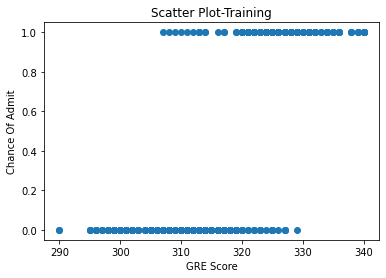

In [23]:
plt.scatter(X_train_a, Y_train_arr)
plt.title("Scatter Plot-Training")
plt.xlabel("GRE Score")
plt.ylabel("Chance Of Admit")
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

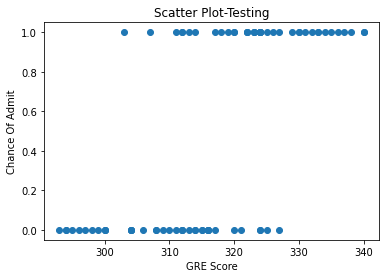

In [24]:
plt.scatter(X_test_a, Y_test_arr)
plt.title("Scatter Plot-Testing")
plt.xlabel("GRE Score")
plt.ylabel("Chance Of Admit")
plt

Text(0.5, 0, 'Random Numbers')

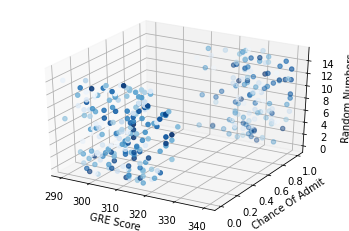

In [25]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
z = np.linspace(0, 15, 320)
zdata = 1 * np.random.random(320)
ax.scatter3D(X_train_a, Y_train_arr, z, c = zdata, cmap = 'Blues')
ax.set_xlabel('GRE Score', fontsize= 10)
ax.set_ylabel("Chance Of Admit", fontsize=10)
ax.set_zlabel("Random Numbers", fontsize=10)

Text(0.5, 0, 'Random Numbers')

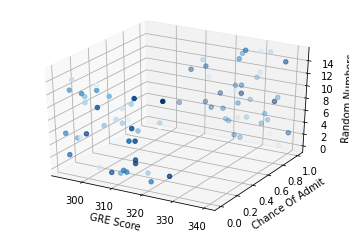

In [26]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
z = np.linspace(0, 15, 80)
zdata = 1 * np.random.random(80)
ax.scatter3D(X_test_a, Y_test_arr, z, c = zdata, cmap = 'Blues')
ax.set_xlabel("GRE Score", fontsize=10)
ax.set_ylabel("Chance Of Admit", fontsize=10)
ax.set_zlabel("Random Numbers", fontsize=10)

### **Corelation Between Features**

In [27]:
df_corr = df.corr() 

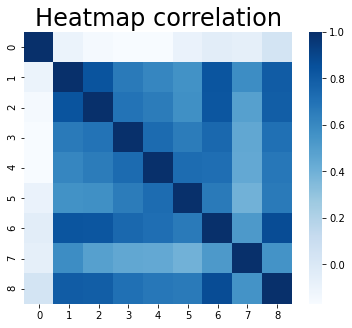

In [28]:
plt.figure(figsize=(6,5))
seaborn.heatmap(df_corr, cmap='Blues') 
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

### **Applying SVM**

In [29]:
classifier = svm.SVC(kernel='linear') 

In [30]:
classifier.fit(X_train_arr, Y_train_arr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
train_pred = classifier.predict(X_train_arr)

In [32]:
confusion_matrix = metrics.confusion_matrix(Y_train_arr, train_pred)
print(confusion_matrix)

[[177  11]
 [ 18 114]]


In [33]:
print("Train Accuracy: ", (confusion_matrix[0][0]+confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1]))

Train Accuracy:  0.909375


### **Testing Of Model**

In [34]:
test_pred = classifier.predict(X_test_arr)

In [35]:
confusion_matrix = metrics.confusion_matrix(Y_test_arr, test_pred)
print(confusion_matrix)

[[35  5]
 [10 30]]


In [36]:
print("Test Accuracy: ", (confusion_matrix[0][0]+confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1]))

Test Accuracy:  0.8125


### **Changing The Kernel**

#### **Polynomial Kernel**

In [37]:
classifier_poly = svm.SVC(kernel='poly',class_weight={0:0.60, 1:0.40})

In [38]:
classifier_poly.fit(X_train_arr, Y_train_arr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight={0: 0.6, 1: 0.4},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [39]:
poly_pred = classifier_poly.predict(X_test_arr)

In [40]:
confusion_matrix = metrics.confusion_matrix(Y_test_arr, poly_pred)
print(confusion_matrix)

[[37  3]
 [23 17]]


In [41]:
print("Test Accuracy: ", (confusion_matrix[0][0]+confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1]))

Test Accuracy:  0.675


#### **RBF Kernel**

In [42]:
classifier_rbf = svm.SVC(kernel='rbf',class_weight={0:0.60, 1:0.40})

In [43]:
classifier_rbf.fit(X_train_arr, Y_train_arr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight={0: 0.6, 1: 0.4},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [44]:
rbf_pred = classifier_rbf.predict(X_test_arr)

In [45]:
confusion_matrix = metrics.confusion_matrix(Y_test_arr, rbf_pred)
print(confusion_matrix)

[[40  0]
 [40  0]]


In [46]:
print("Test Accuracy: ", (confusion_matrix[0][0]+confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1]))

Test Accuracy:  0.5


#### **Sigmoid Kernel**

In [47]:
classifier_sig = svm.SVC(kernel='sigmoid',class_weight={0:0.60, 1:0.40})

In [48]:
classifier_sig.fit(X_train_arr, Y_train_arr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight={0: 0.6, 1: 0.4},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [49]:
sig_pred = classifier_poly.predict(X_test_arr)

In [50]:
confusion_matrix = metrics.confusion_matrix(Y_test_arr, sig_pred)
print(confusion_matrix)

[[37  3]
 [23 17]]


In [51]:
print("Test Accuracy: ", (confusion_matrix[0][0]+confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1]))

Test Accuracy:  0.675
